In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras.optimizers import *

import matplotlib.pyplot as plt
import seaborn as sns

from keras import models
from keras.utils import np_utils

In [5]:
model = models.load_model("./model/20_70_72")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 1)]     0         
                                                                 
 random_flip (RandomFlip)    (None, 150, 150, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 4)       40        
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 4)      16        
 ormalization)                                                   
                                                                 
 average_pooling2d (AverageP  (None, 75, 75, 4)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 8)         296   

2022-03-11 11:08:48.538719: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-11 11:08:48.561107: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-11 11:08:48.561205: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-11 11:08:48.561630: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [11]:
# 첫 번째 등장하는 컨볼루션 레이어의 모든 피처맵 출력
def show_first_feature_map(loaded_model, img, number):
    first_output = loaded_model.layers[number].output
    print(first_output.shape, first_output.dtype)   # (?, 148, 148, 32) <dtype: 'float32'>

    # 1개의 출력을 갖는 새로운 모델 생성
    model = tf.keras.models.Model(inputs=loaded_model.input, outputs=first_output)

    # 입력으로부터 높이와 너비를 사용해서 target_size에 해당하는 튜플 생성
    img_tensor = img

    print(loaded_model.input.shape)     # (?, 150, 150, 3)
    print(img_tensor.shape)             # (1, 150, 150, 3)

    first_activation = model.predict(img_tensor)

    # 컨볼루션 레이어에서 필터 크기(3), 스트라이드(1), 패딩(valid)을 사용했기 때문에
    # 150에서 148로 크기가 일부 줄었음을 알 수 있다. 필터 개수는 32.
    print(first_activation.shape)       # (1, 148, 148, 32)
    print(first_activation[0, 0, 0])    # [0.00675746 0. 0.02397328 0.03818807 0. ...]

    # 19번째 활성 맵 출력. 기본 cmap은 viridis. gray는 흑백 컬러맵.
    # [0, :, :, feature_index]
    # 0은 첫 번째 데이터(원본 이미지)의 피처맵을 가리킨다. 사진은 1장만 사용했기 때문에 0만 가능
    # 가운데 콜론(:)은 높이와 너비를 가리키는 차원의 모든 데이터
    # feature_index는 보고 싶은 피처맵이 있는 채널을 가리킨다.
    # 32개의 필터를 사용했다면 0부터 31까지의 피처맵이 존재한다.
    plt.figure(figsize=(16, 8))
    for i in range(first_activation.shape[-1]):
        plt.subplot(4, 8, i + 1)

        # 눈금 제거. fignum은 같은 피켜에 연속 출력
        plt.axis('off')
        plt.matshow(first_activation[0, :, :, i], cmap='gray', fignum=0)
    plt.tight_layout()
    plt.show()
  


In [7]:
x_data =  np.load('./data/X_none_C.npy')
x_data = x_data/255
x_data = np.expand_dims(x_data, -1)    

In [8]:
x = np.expand_dims(x_data[5], 0)

(None, 150, 150, 4) <dtype: 'float32'>
(None, 150, 150, 1)
(1, 150, 150, 1)
(1, 150, 150, 4)
[0.       0.       0.       0.303892]


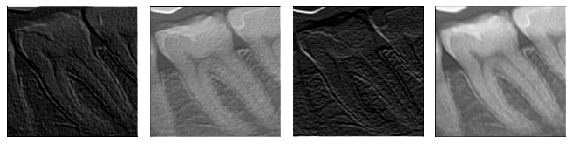

(None, 75, 75, 4) <dtype: 'float32'>
(None, 150, 150, 1)
(1, 150, 150, 1)
(1, 75, 75, 4)
[ 2.1582196  -1.0257251  -0.50876343  0.707921  ]


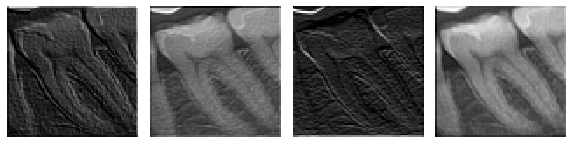

In [ ]:
show_first_feature_map(model, x, 2)
show_first_feature_map(model, x, 4)

(None, 75, 75, 8) <dtype: 'float32'>
(None, 150, 150, 1)
(1, 150, 150, 1)
(1, 75, 75, 8)
[1.3080075  0.13849968 0.61168265 0.69515026 0.6024542  0.5922861
 0.         0.42150825]


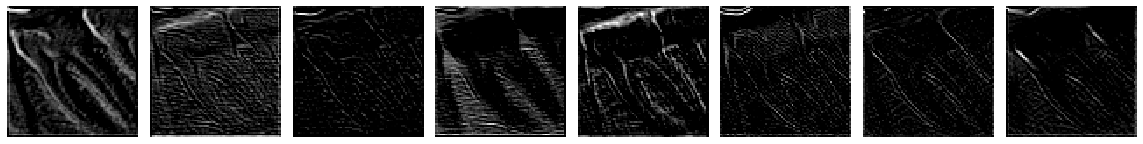

(None, 37, 37, 8) <dtype: 'float32'>
(None, 150, 150, 1)
(1, 150, 150, 1)
(1, 37, 37, 8)
[ 4.3671417  -0.12153153  2.255945    2.3059852   0.29582292  2.2269793
  0.00491232  4.902709  ]


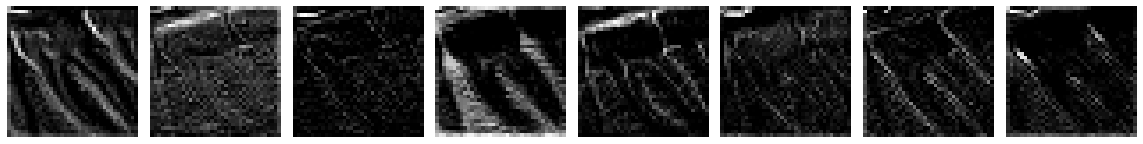

In [15]:
show_first_feature_map(model, x, 5)
show_first_feature_map(model, x, 7)

(None, 37, 37, 16) <dtype: 'float32'>
(None, 150, 150, 1)
(1, 150, 150, 1)
(1, 37, 37, 16)
[0.         0.         0.84546626 0.         0.         0.
 0.         0.14046249 0.         1.7559134  0.47903693 0.
 1.9599314  0.         0.15313517 1.0598985 ]


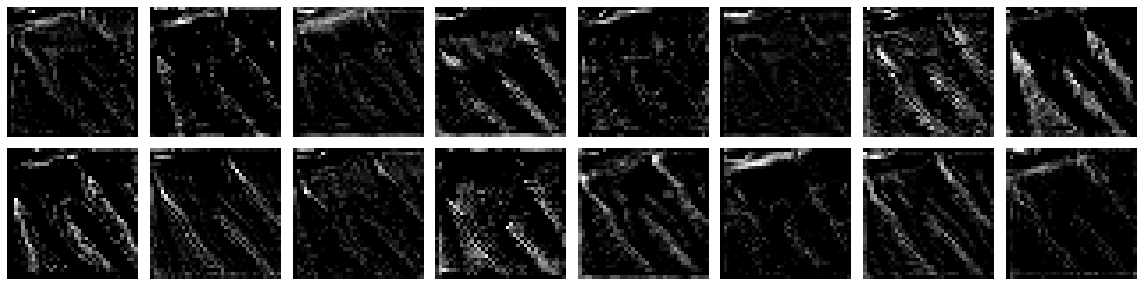

(None, 18, 18, 16) <dtype: 'float32'>
(None, 150, 150, 1)
(1, 150, 150, 1)
(1, 18, 18, 16)
[-0.2898045   0.9565985   2.5762148  -0.56940013  0.00671759  0.35781184
  1.6445838   0.85423523 -0.73478365  2.287681    1.8964244  -0.7721855
  2.7280447   1.1610563   3.0493917   1.8126662 ]


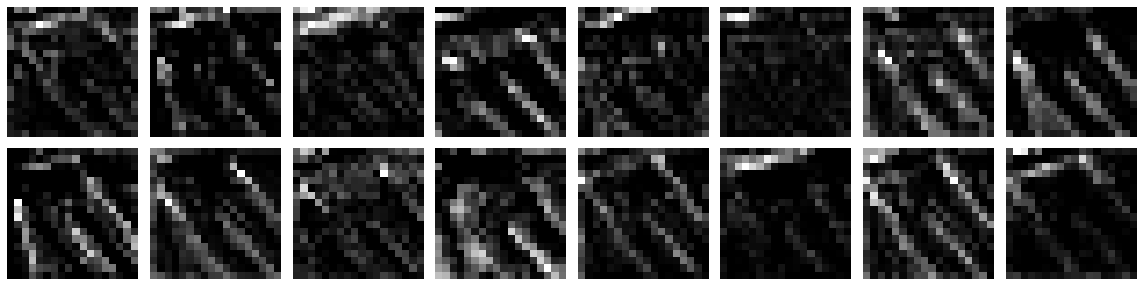

In [16]:
show_first_feature_map(model, x, 8)
show_first_feature_map(model, x, 10)

(None, 18, 18, 32) <dtype: 'float32'>
(None, 150, 150, 1)
(1, 150, 150, 1)
(1, 18, 18, 32)
[0.         0.         0.         0.         0.         1.9702783
 0.         0.91095454 0.         0.         0.         0.
 0.         0.         0.         0.         1.2365237  0.
 0.         0.42820838 0.         0.7158407  0.         0.
 0.         0.         0.96207756 0.         0.         0.
 0.         0.        ]


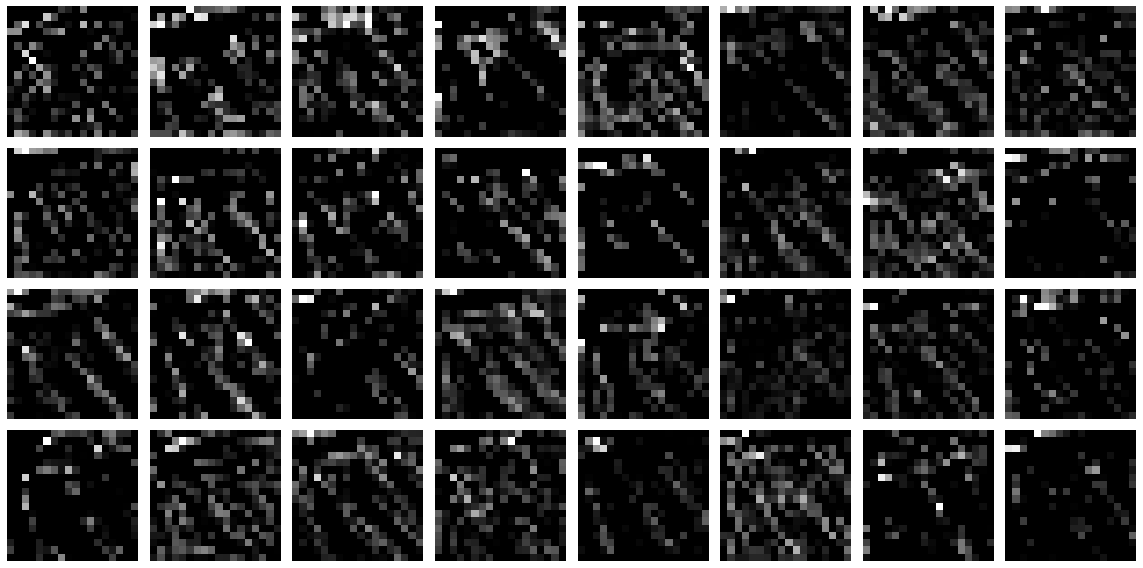

(None, 9, 9, 32) <dtype: 'float32'>
(None, 150, 150, 1)
(1, 150, 150, 1)
(1, 9, 9, 32)
[-0.62168497  0.24859092  0.5548395  -0.5874545  -0.5989626   4.6317997
  0.37407395  1.441253    0.65095943 -0.7376175  -0.48335877  0.0203568
 -0.46029788 -0.70562047 -0.0149482   2.7914145   2.944118   -0.5867254
  2.1104324   1.399326    0.6514427   6.0799656  -0.55214494 -0.3316525
 -0.45043012 -0.45995784  1.6384901  -0.76683325  0.82124335  1.0548171
 -0.3569458  -0.35416052]


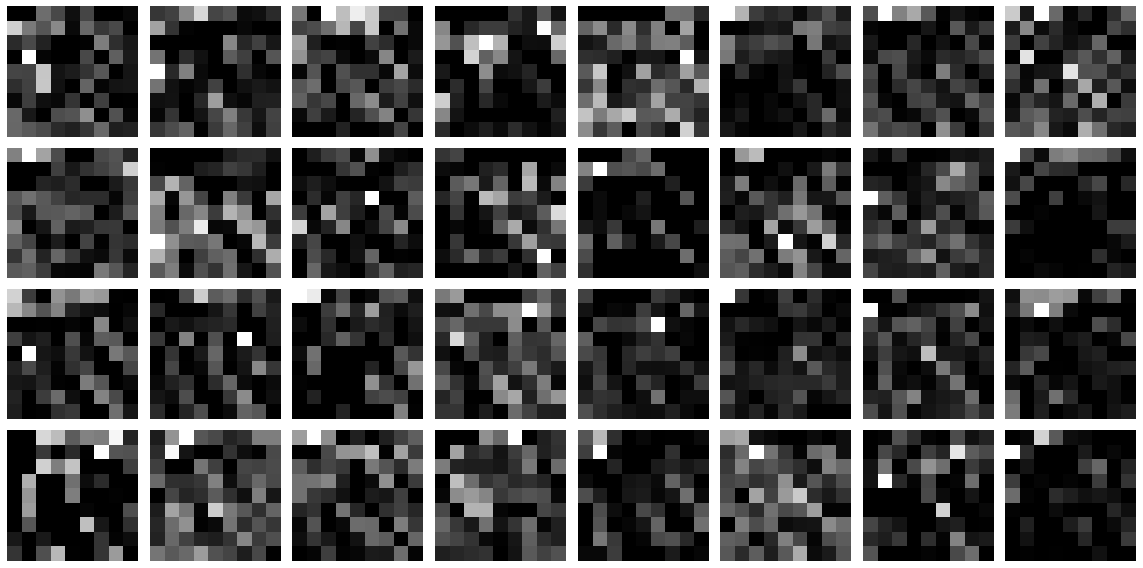

In [17]:
show_first_feature_map(model, x, 11)
show_first_feature_map(model, x, 13)